In [2]:
import sys
sys.path.append('../../component')
from utils import *
from run_EDA import run_eda
from run_ARIMA import run_arima
from run_LSTM import set_lstm_data, run_lstm, lstm_eval
import os
os.getcwd()

'/home/ubuntu/Capstone_Group_1/code/main_code/test'

In [3]:
path = '../../data/weather.csv'
target = 'temperature'
dataset = 'wea'
seq_length = 6

In [4]:
df_train, df_test, train, test = prepare_arima_data(path, target)
print('Train shape', train.shape, '\nTest shape', test.shape)

Train shape (84211, 1) 
Test shape (21053, 1)


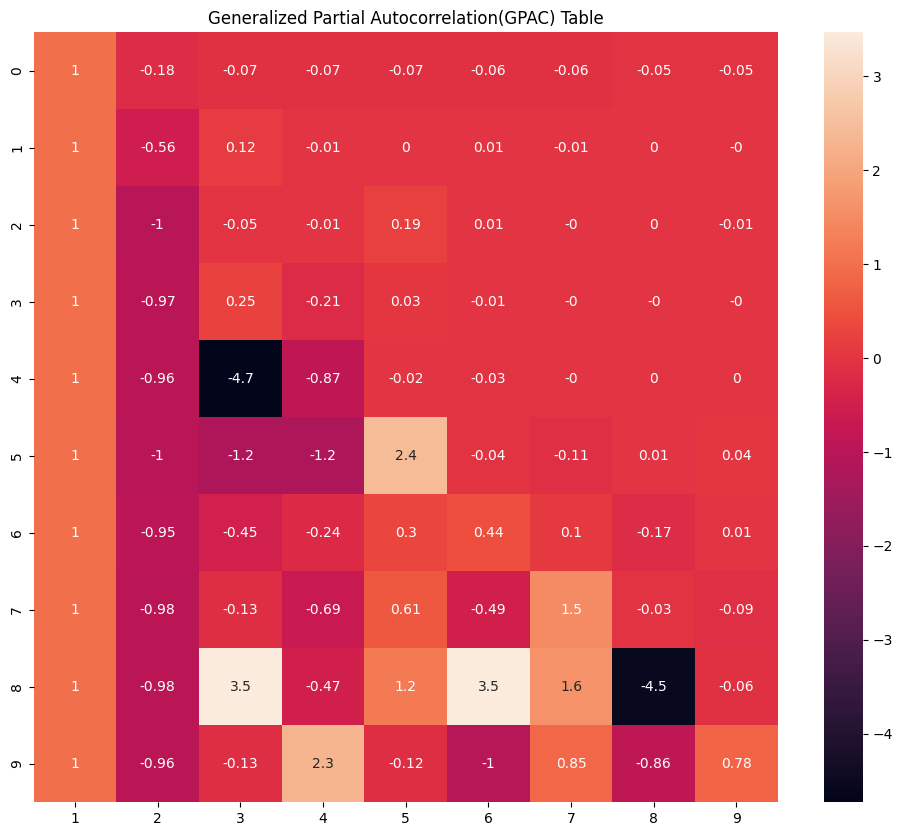

In [5]:
fig = GPAC_table(train, J=10, K=10)
fig.savefig('./gpac/wea.pdf', dpi=300, bbox_inches='tight')

In [6]:
model_name = 'lstm'

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.09212797
Epoch [11/100], Loss: 0.00036430
Epoch [21/100], Loss: 0.00035552
Epoch [31/100], Loss: 0.00035339
Epoch [41/100], Loss: 0.00035228
Epoch [51/100], Loss: 0.00035216
Epoch [61/100], Loss: 0.00035045
Epoch [71/100], Loss: 0.00035088
Epoch [81/100], Loss: 0.00034953
Epoch [91/100], Loss: 0.00034898
loss: 0.00032187920003734965


0.1822894

In [7]:
'''BiLSTM'''
model_name='Bilstm'

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.04518737
Epoch [11/100], Loss: 0.00040307
Epoch [21/100], Loss: 0.00036305
Epoch [31/100], Loss: 0.00036022
Epoch [41/100], Loss: 0.00035933
Epoch [51/100], Loss: 0.00035785
Epoch [61/100], Loss: 0.00035618
Epoch [71/100], Loss: 0.00035641
Epoch [81/100], Loss: 0.00035577
Epoch [91/100], Loss: 0.00035522
loss: 0.0003310922952330271


0.1875079

In [8]:
# '''Seq2seq'''
model_name='seq2seq'

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.08546173
Epoch [11/100], Loss: 0.00045876
Epoch [21/100], Loss: 0.00036851
Epoch [31/100], Loss: 0.00036231
Epoch [41/100], Loss: 0.00035750
Epoch [51/100], Loss: 0.00035832
Epoch [61/100], Loss: 0.00035614
Epoch [71/100], Loss: 0.00035653
Epoch [81/100], Loss: 0.00035336
Epoch [91/100], Loss: 0.00035376
loss: 0.00032356113208675884


0.18324247

In [11]:
# transformer
from run_Transformer import set_data, run_transformer, transformer_eval
epoches = 100
batch_size = 128

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length, batch_size)
model = run_transformer(dataset, train_loader, epoches)
predictions = transformer_eval(dataset, model, test_loader, scaler)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Loss: 0.04043794
Epoch [2/100], Loss: 0.01357779
Epoch [3/100], Loss: 0.01155836
Epoch [4/100], Loss: 0.01017709
Epoch [5/100], Loss: 0.00913971
Epoch [6/100], Loss: 0.00901189
Epoch [7/100], Loss: 0.00842886
Epoch [8/100], Loss: 0.00802025
Epoch [9/100], Loss: 0.00772361
Epoch [10/100], Loss: 0.00743902
Epoch [11/100], Loss: 0.00703989
Epoch [12/100], Loss: 0.00693000
Epoch [13/100], Loss: 0.00663964
Epoch [14/100], Loss: 0.00644571
Epoch [15/100], Loss: 0.00660192
Epoch [16/100], Loss: 0.00625154
Epoch [17/100], Loss: 0.00606408
Epoch [18/100], Loss: 0.00584815
Epoch [19/100], Loss: 0.00579817
Epoch [20/100], Loss: 0.00574830
Epoch [21/100], Loss: 0.00551706
Epoch [22/100], Loss: 0.00559505
Epoch [23/100], Loss: 0.00546030
Epoch [24/100], Loss: 0.00538282
Epoch [25/100], Loss: 0.00530682
Epoch [26/100], Loss: 0.00532397
Epoch [27/100], Loss: 0.00524395
Epoch [28/100], Loss: 0.00524462
Epoch [29/100], Loss: 0.00501423
Epoch [30/100], Loss: 0.00503771
Epoch [31/100], Los